In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.columns=['date_time','aep_mw']
df['date_time']=pd.to_datetime(df['date_time'])
df.sort_values('date_time',ascending=True,inplace=True)
df['date_time']=df['date_time'].astype(str)

In [3]:
df['log_aep_mw']=np.log(df['aep_mw'])

In [4]:
def preparion_train (df,num_lags,lag_feature,trigerred_time):

    df_lags=pd.DataFrame(index=df.index,columns=['lags_{}'.format(i) for i in range(num_lags)])
    for i in range(num_lags):
        df_lags['lags_{}'.format(i)]=df[lag_feature].shift(i)
    
    df_targets=pd.DataFrame(index=df.index,columns=['step_{}'.format(i) for i in range(16,40)])
    for i in range(16,40):
        df_targets['step_{}'.format(i)]=df[lag_feature].shift(-i)
    
    df_processed=pd.concat([df[['date_time']],df_targets,df_lags],axis=1)
    #df_processed=df_processed[pd.to_datetime(df_processed['date_time']).dt.hour==trigerred_time]
    return df_processed.dropna()

In [5]:
df_prcessed=preparion_train(df,168*4,'aep_mw',8)
df_prcessed

,date_time,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
1558,2004-10-29 00:00:00,15071.0,15134.0,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0
1511,2004-10-29 01:00:00,15134.0,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0
1512,2004-10-29 02:00:00,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0
1513,2004-10-29 03:00:00,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,11297.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0
1514,2004-10-29 04:00:00,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,11297.0,11036.0,...,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116166,2018-08-01 05:00:00,16457.0,16197.0,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,...,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0,12789.0,13036.0
116167,2018-08-01 06:00:00,16197.0,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,...,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0,12789.0
116168,2018-08-01 07:00:00,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,13661.0,...,20494.0,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0
116169,2018-08-01 08:00:00,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,13661.0,14326.0,...,20169.0,20494.0,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0


In [6]:
train_df=df_prcessed[df_prcessed['date_time']<='2017-08-02 23:00:00']
X_train=train_df[train_df.columns[train_df.columns.str.contains('lags_')]]
y_train=train_df[train_df.columns[train_df.columns.str.contains('step_')]]

In [7]:
test_df=df_prcessed[(df_prcessed['date_time']>'2017-08-02 23:00:00') & (pd.to_datetime(df_prcessed['date_time']).dt.hour==8)]
X_test=test_df[test_df.columns[test_df.columns.str.contains('lags_')]]
y_test=test_df[test_df.columns[test_df.columns.str.contains('step_')]]

In [8]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler().fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)
scaler_y=MinMaxScaler().fit(y_train)
y_train_s=scaler_y.transform(y_train)
y_test_s=scaler_y.transform(y_test)

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.losses import MeanAbsoluteError 
from tensorflow.keras.optimizers import Adam

In [41]:
model=Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=24))
model.compile(optimizer=Adam(learning_rate=0.001),loss='mse')
model.fit(X_train_s,y_train,epochs=100,validation_data=(X_test_s,y_test))
pred=model.predict(X_test_s)

Epoch 1/100
3496/3496 [==============================] - 12s 3ms/step - loss: 36855712.0000 - val_loss: 11200233.0000
Epoch 2/100
3496/3496 [==============================] - 8s 2ms/step - loss: 10638689.0000 - val_loss: 10507650.0000
Epoch 3/100
3496/3496 [==============================] - 9s 2ms/step - loss: 9870998.0000 - val_loss: 9823860.0000
Epoch 4/100
3496/3496 [==============================] - 10s 3ms/step - loss: 9095987.0000 - val_loss: 8585969.0000
Epoch 5/100
3496/3496 [==============================] - 9s 3ms/step - loss: 7728718.0000 - val_loss: 7271367.0000
Epoch 6/100
3496/3496 [==============================] - 9s 2ms/step - loss: 6493101.0000 - val_loss: 6380976.0000
Epoch 7/100
3496/3496 [==============================] - 8s 2ms/step - loss: 5846298.0000 - val_loss: 5789949.5000
Epoch 8/100
3496/3496 [==============================] - 9s 3ms/step - loss: 5177493.5000 - val_loss: 5111924.5000
Epoch 9/100
3496/3496 [==============================] - 8s 2ms/step - los

In [42]:
pred2=pred.reshape(-1)

In [43]:
pred2=pd.Series(pred2)

In [44]:
pred2.describe()

count     8736.000000
mean     14889.540039
std       2207.178711
min       9491.883789
25%      13293.535156
50%      14808.144043
75%      16369.245850
max      22128.791016
dtype: float64

In [45]:
y_test2=pd.Series(np.array(y_test).reshape(-1))

In [46]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test2,pred2)

0.06120674908239866

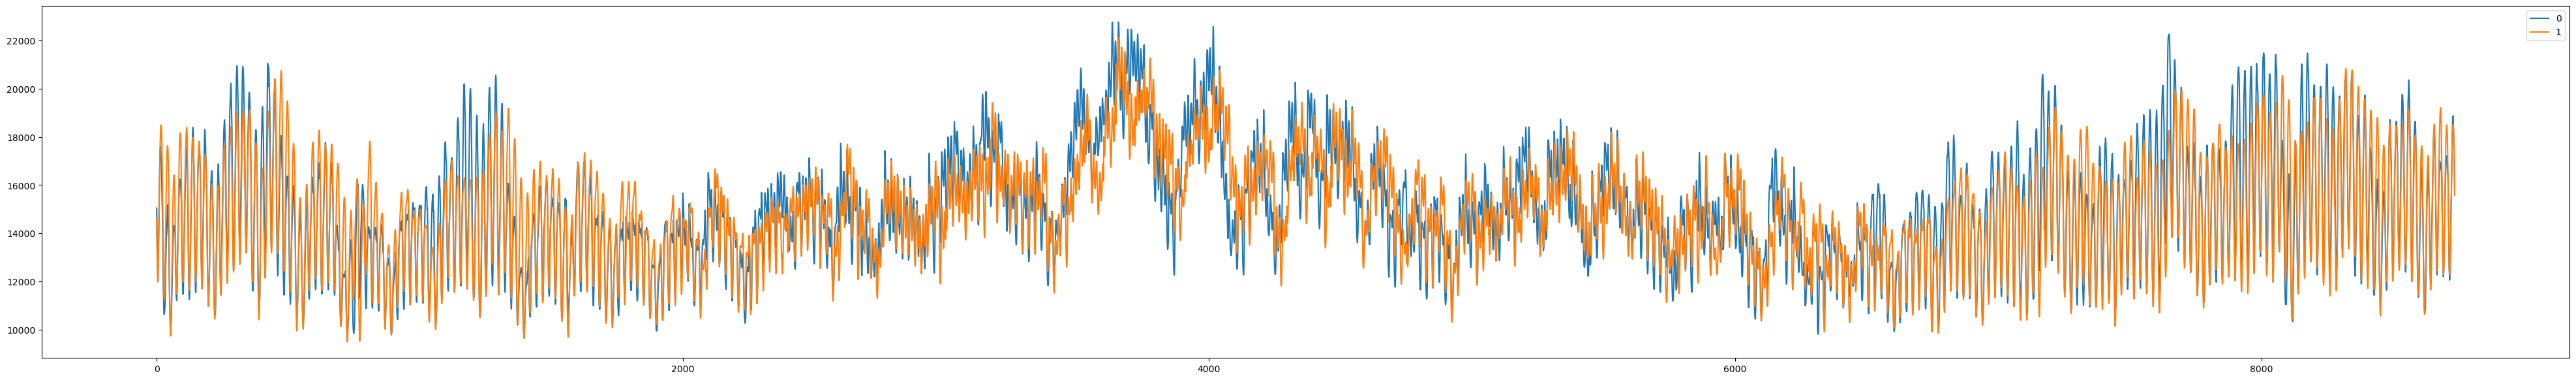

In [47]:
pred_df=pd.concat([y_test2,pred2],axis=1)
pred_df.plot(figsize=(50,7))
pred_df.columns=['aep_mw','forecast']

In [48]:
y_test3=df['aep_mw'].tail(len(pred2))
y_test3.index=pred2.index
pred_df=pd.concat([y_test3,pred2],axis=1)
pred_df.columns=['aep_mw','forecast']

In [49]:
import plotly.graph_objects as go
figure=go.Figure()
figure.add_trace(go.Scatter(y=pred_df['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(y=pred_df['forecast'],name='mlp_forecast'))

In [40]:
mean_absolute_percentage_error(pred_df['aep_mw'],pred_df['forecast'])

0.0646470025256257